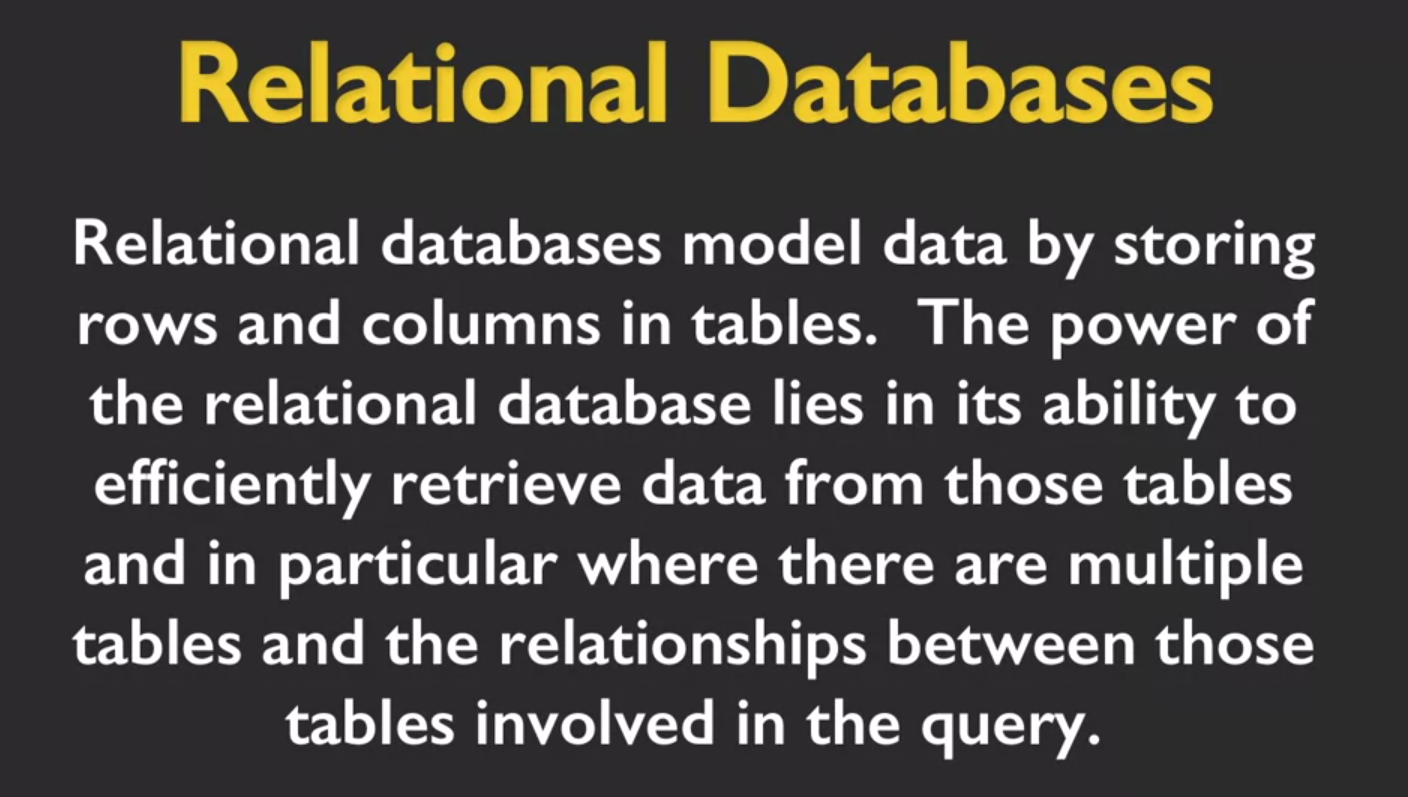
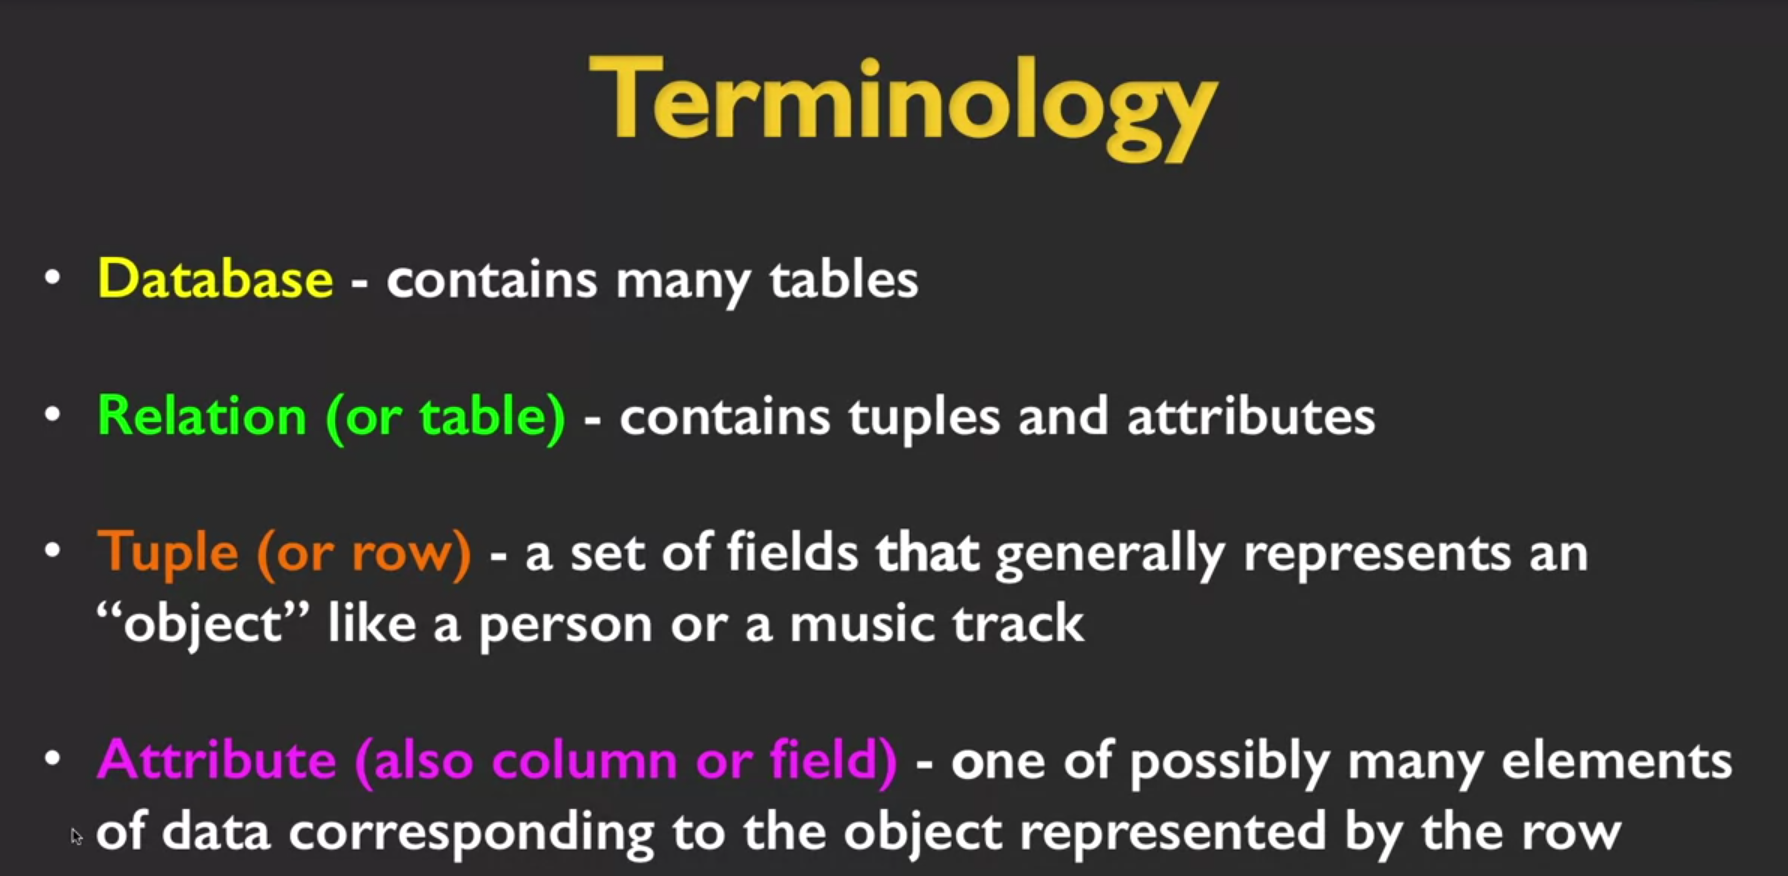
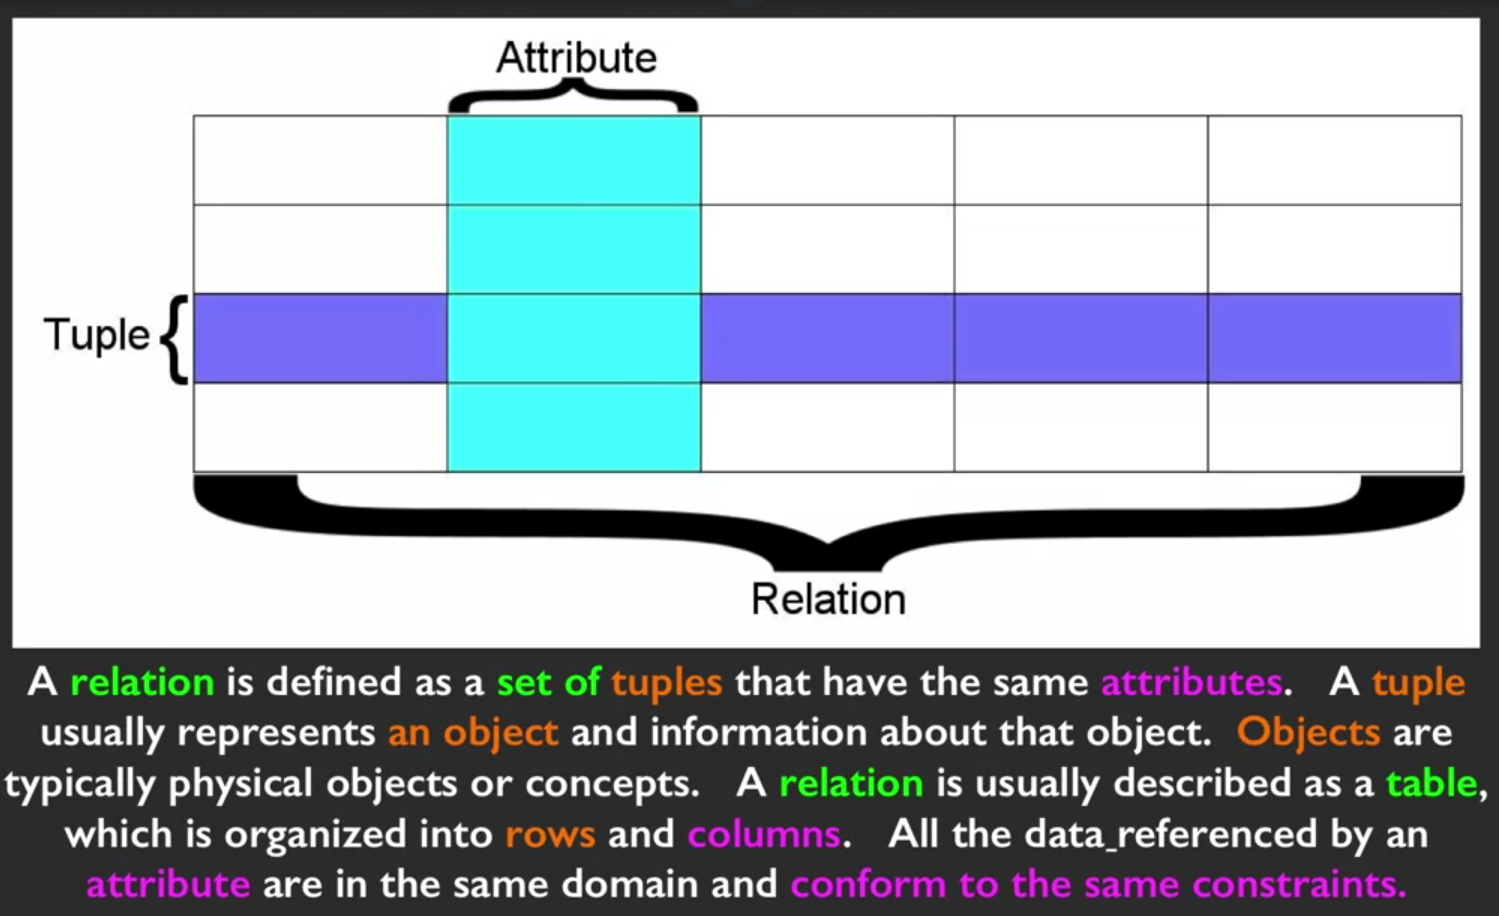

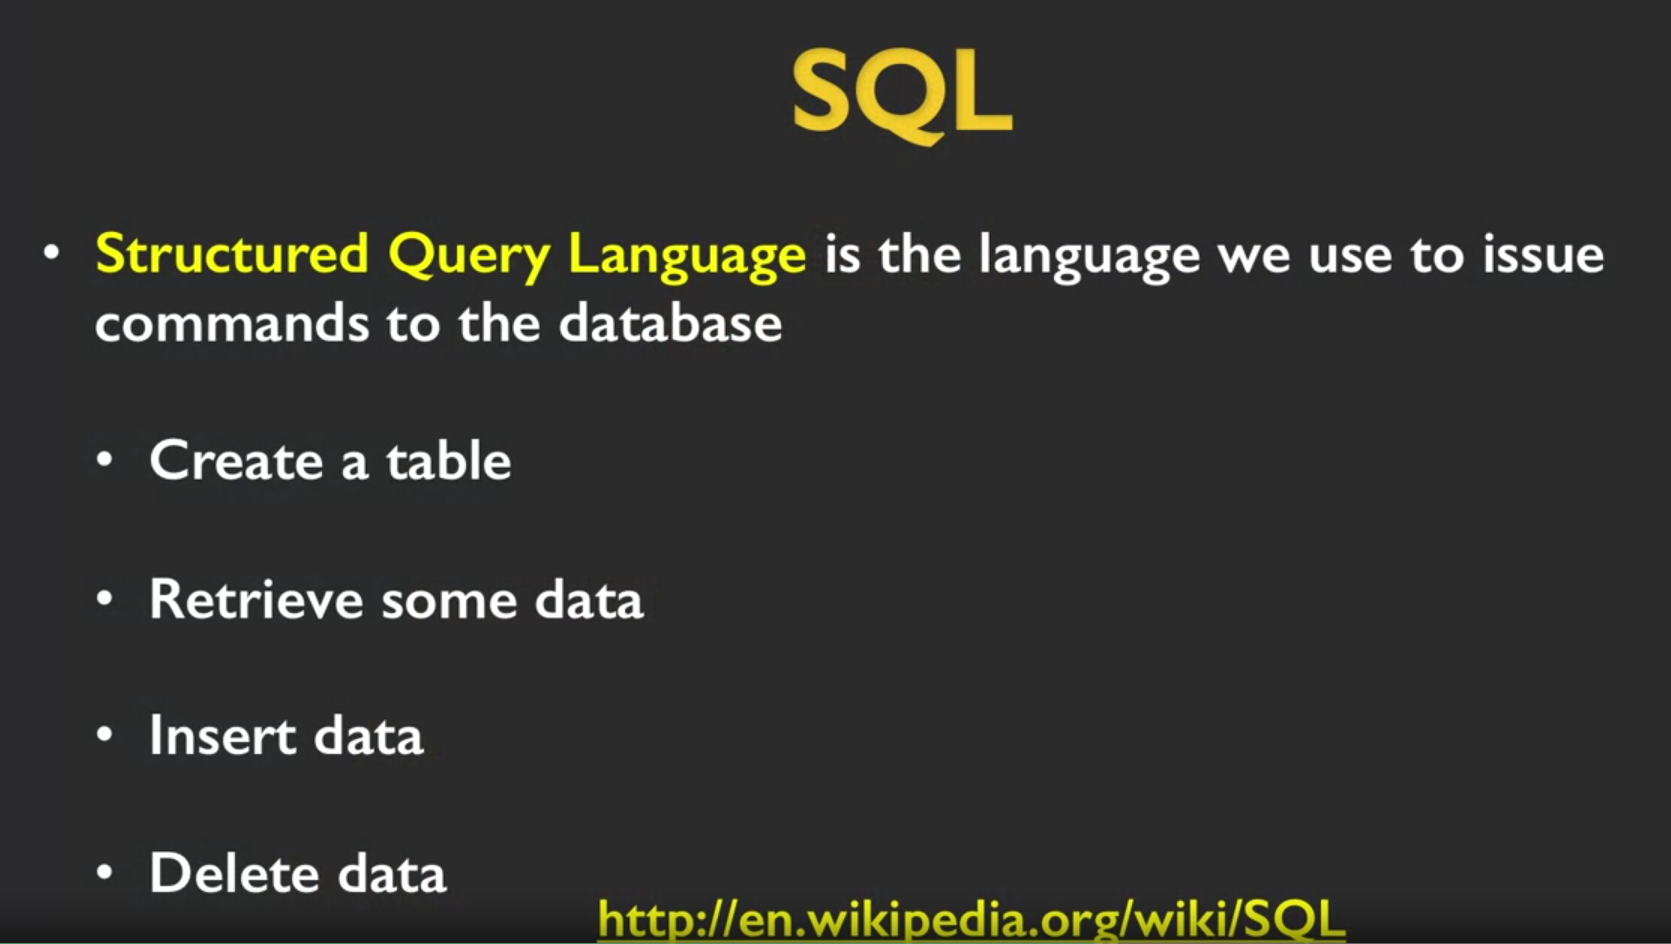

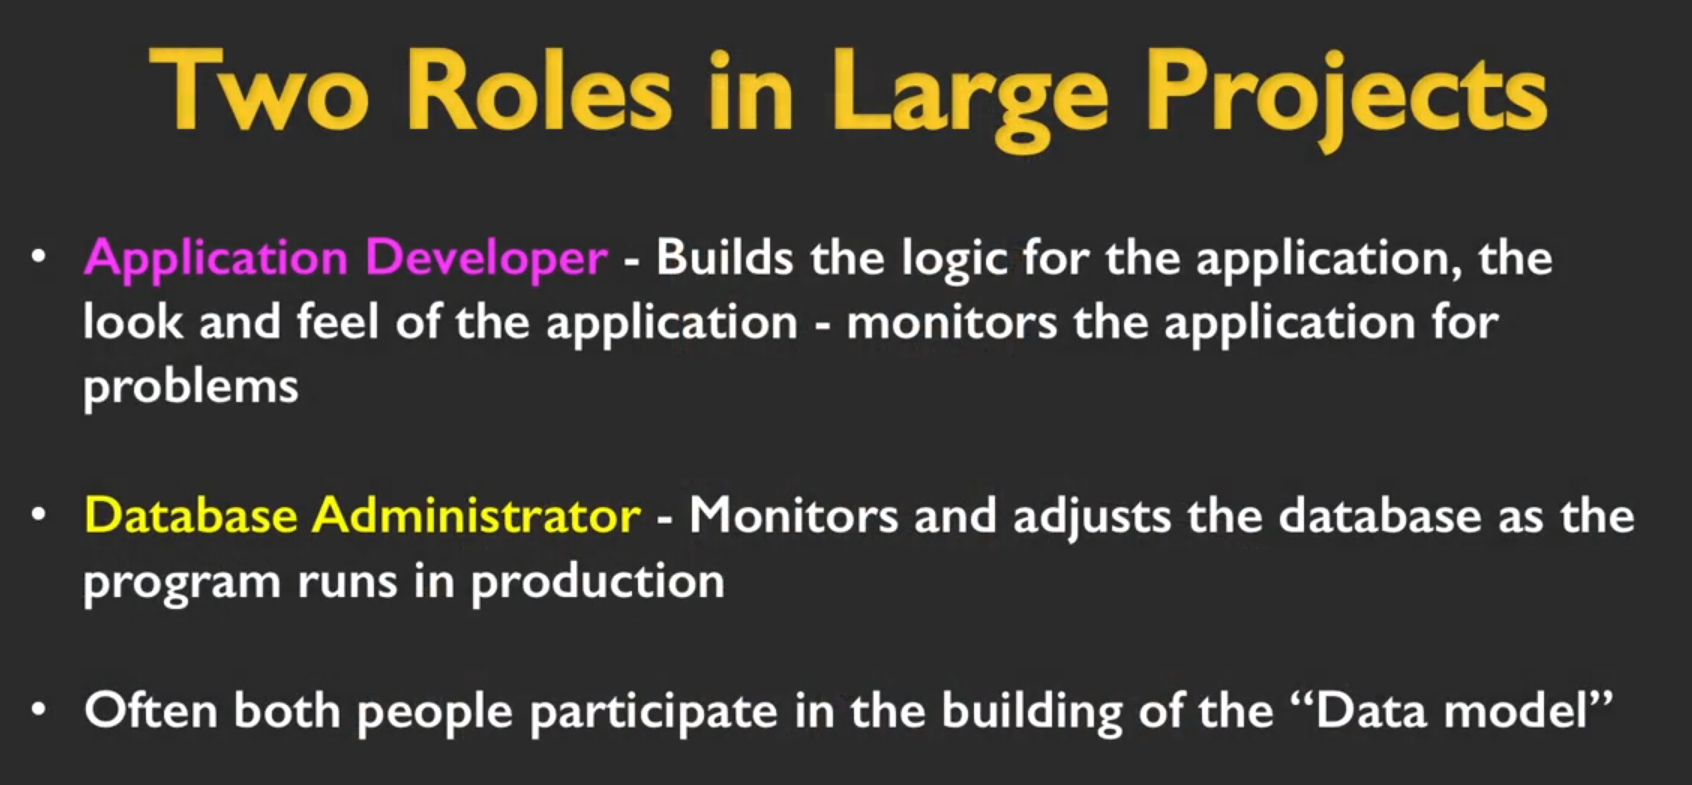

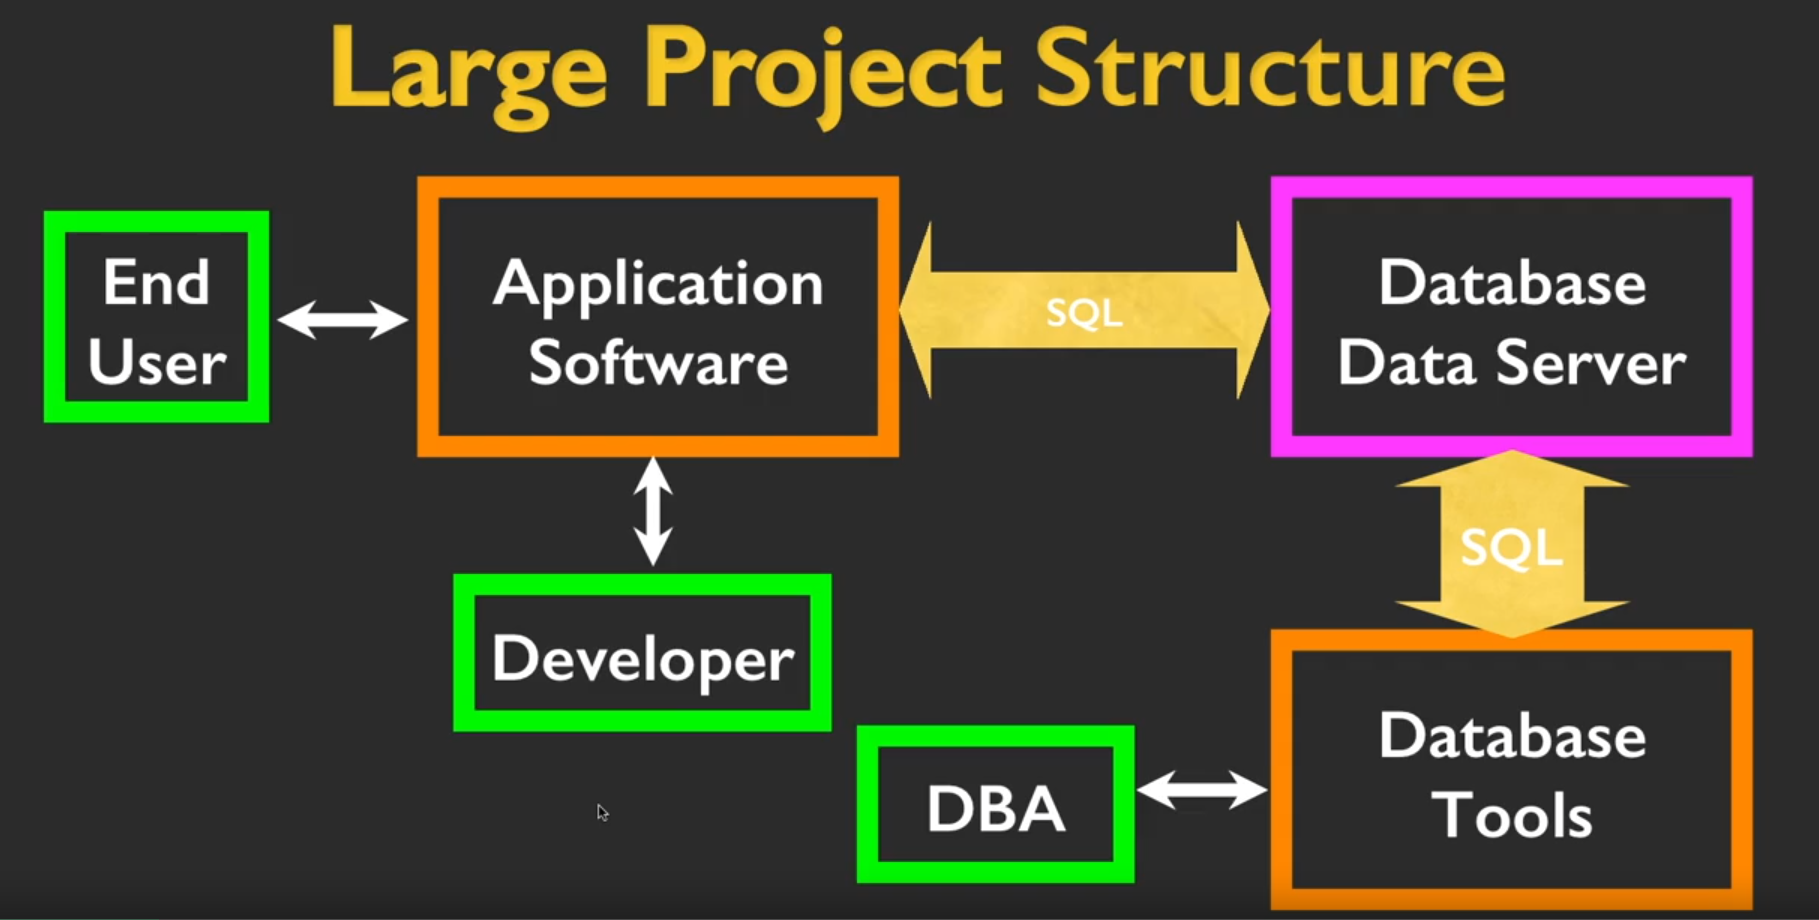

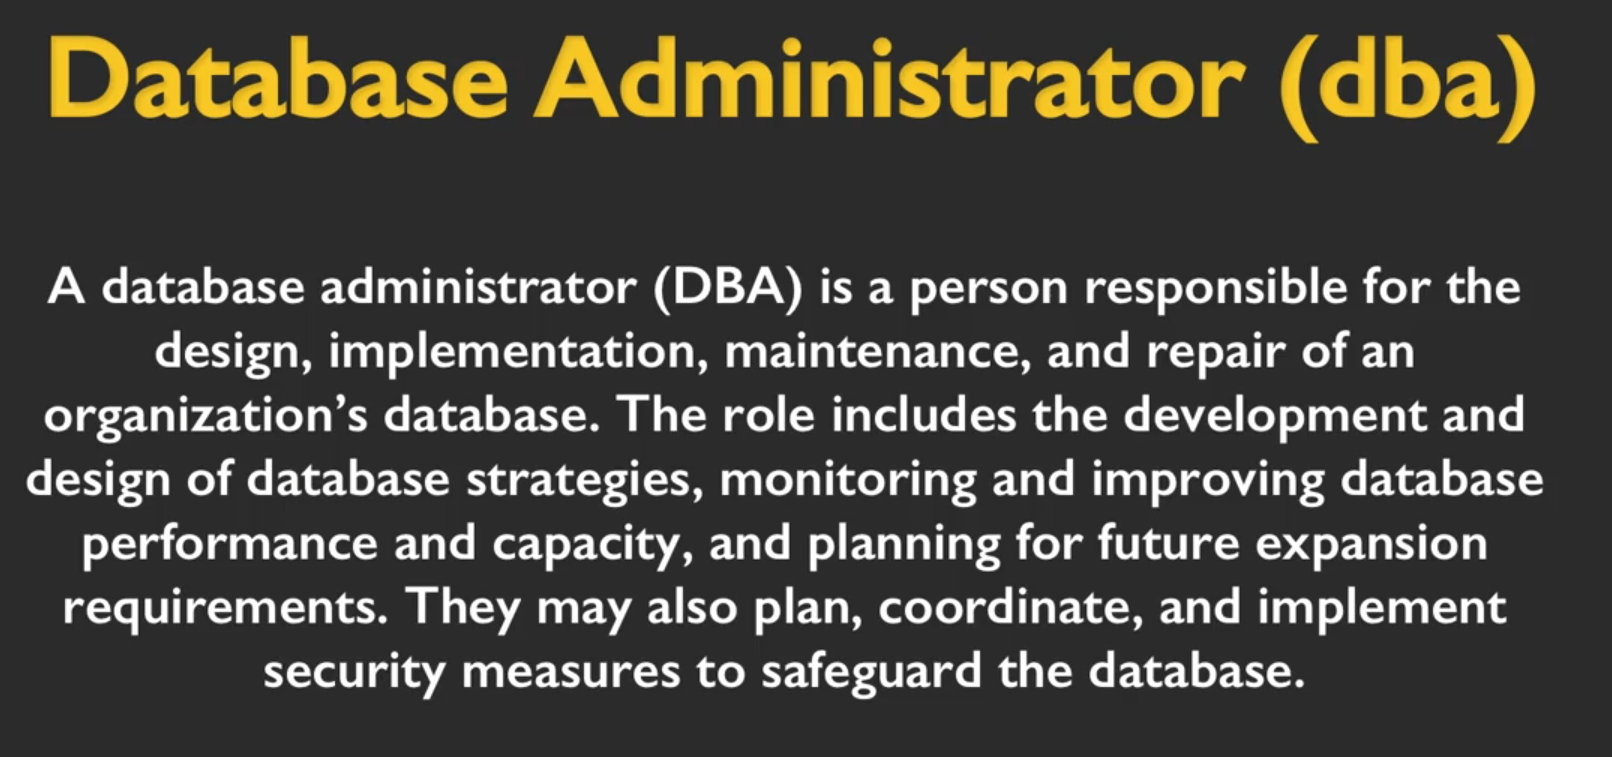

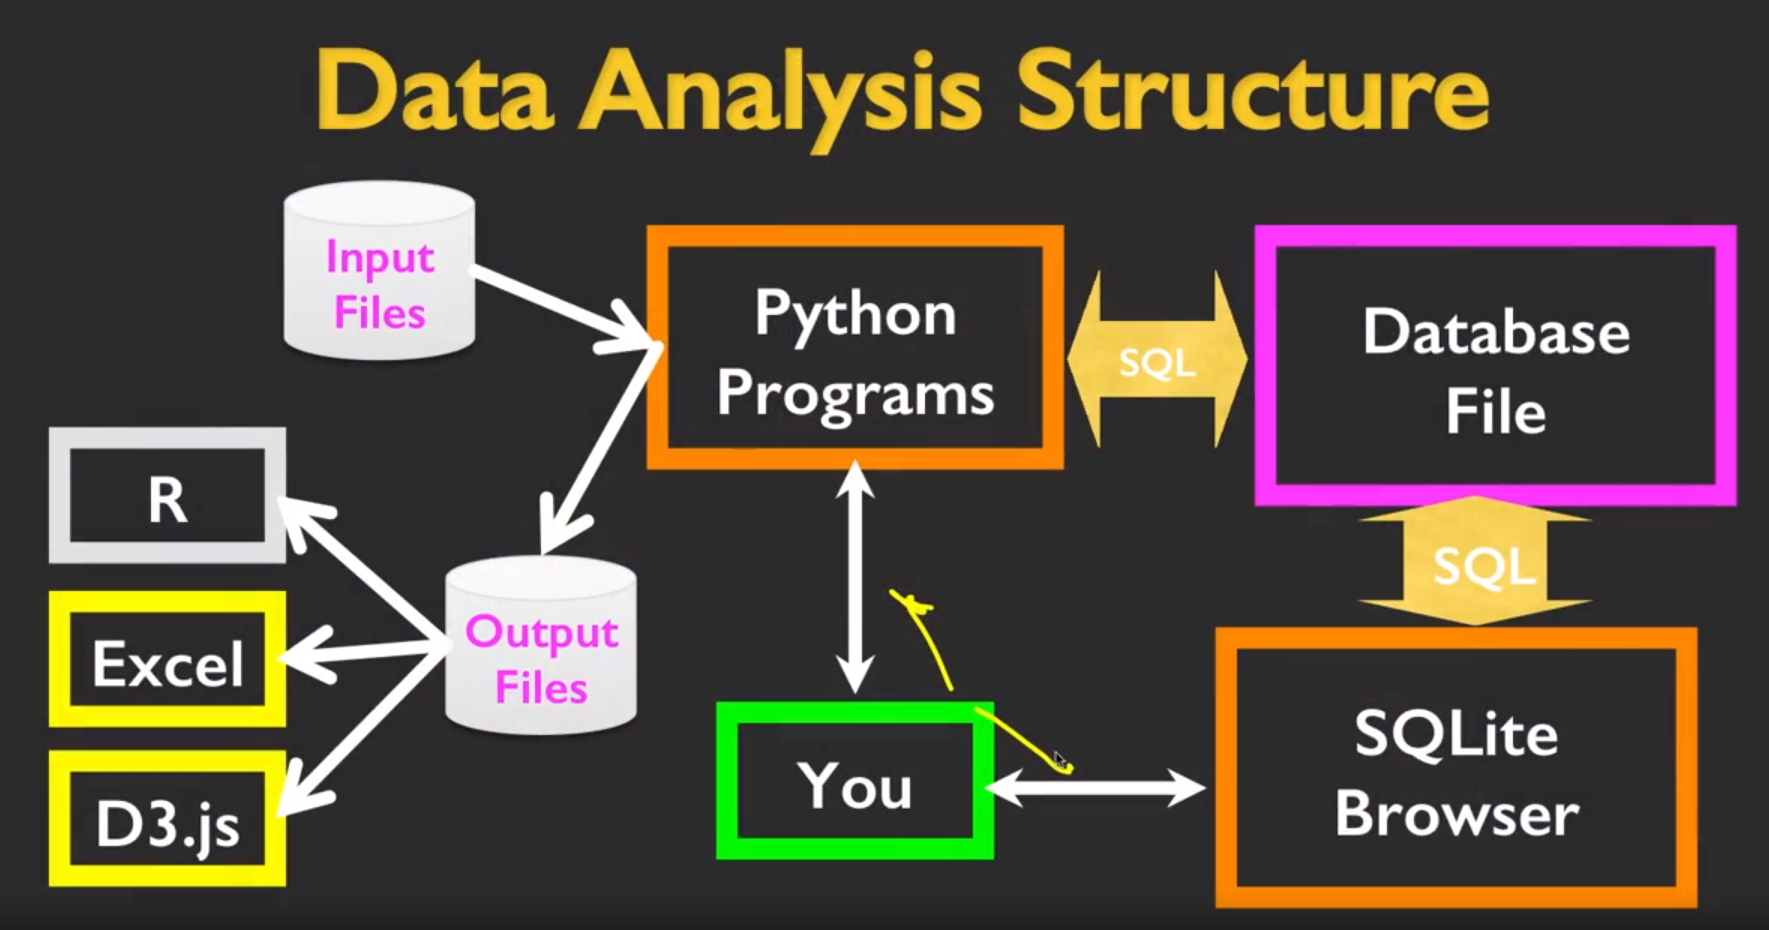

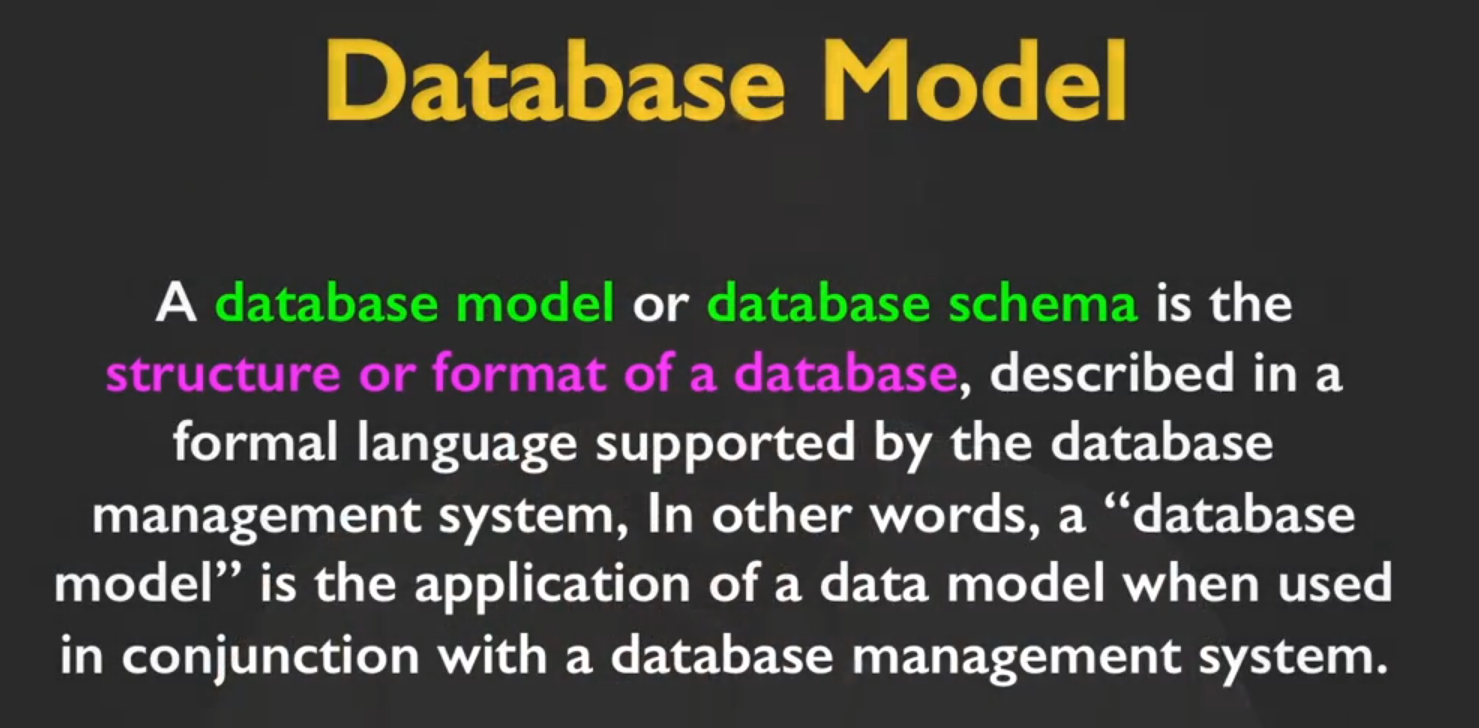

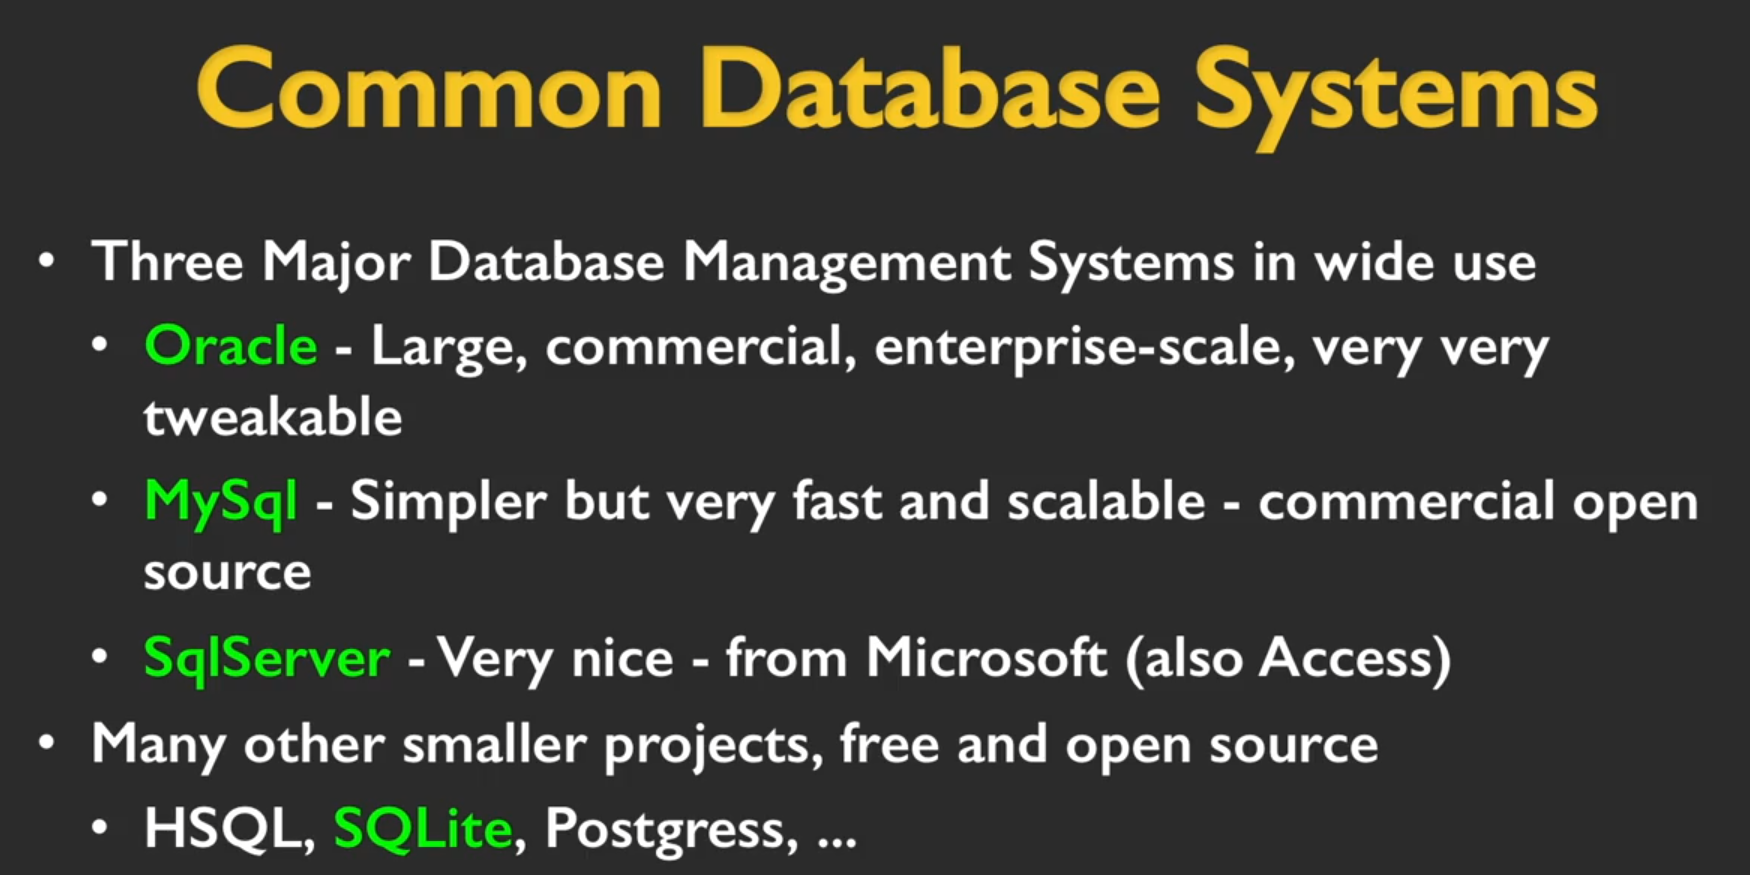

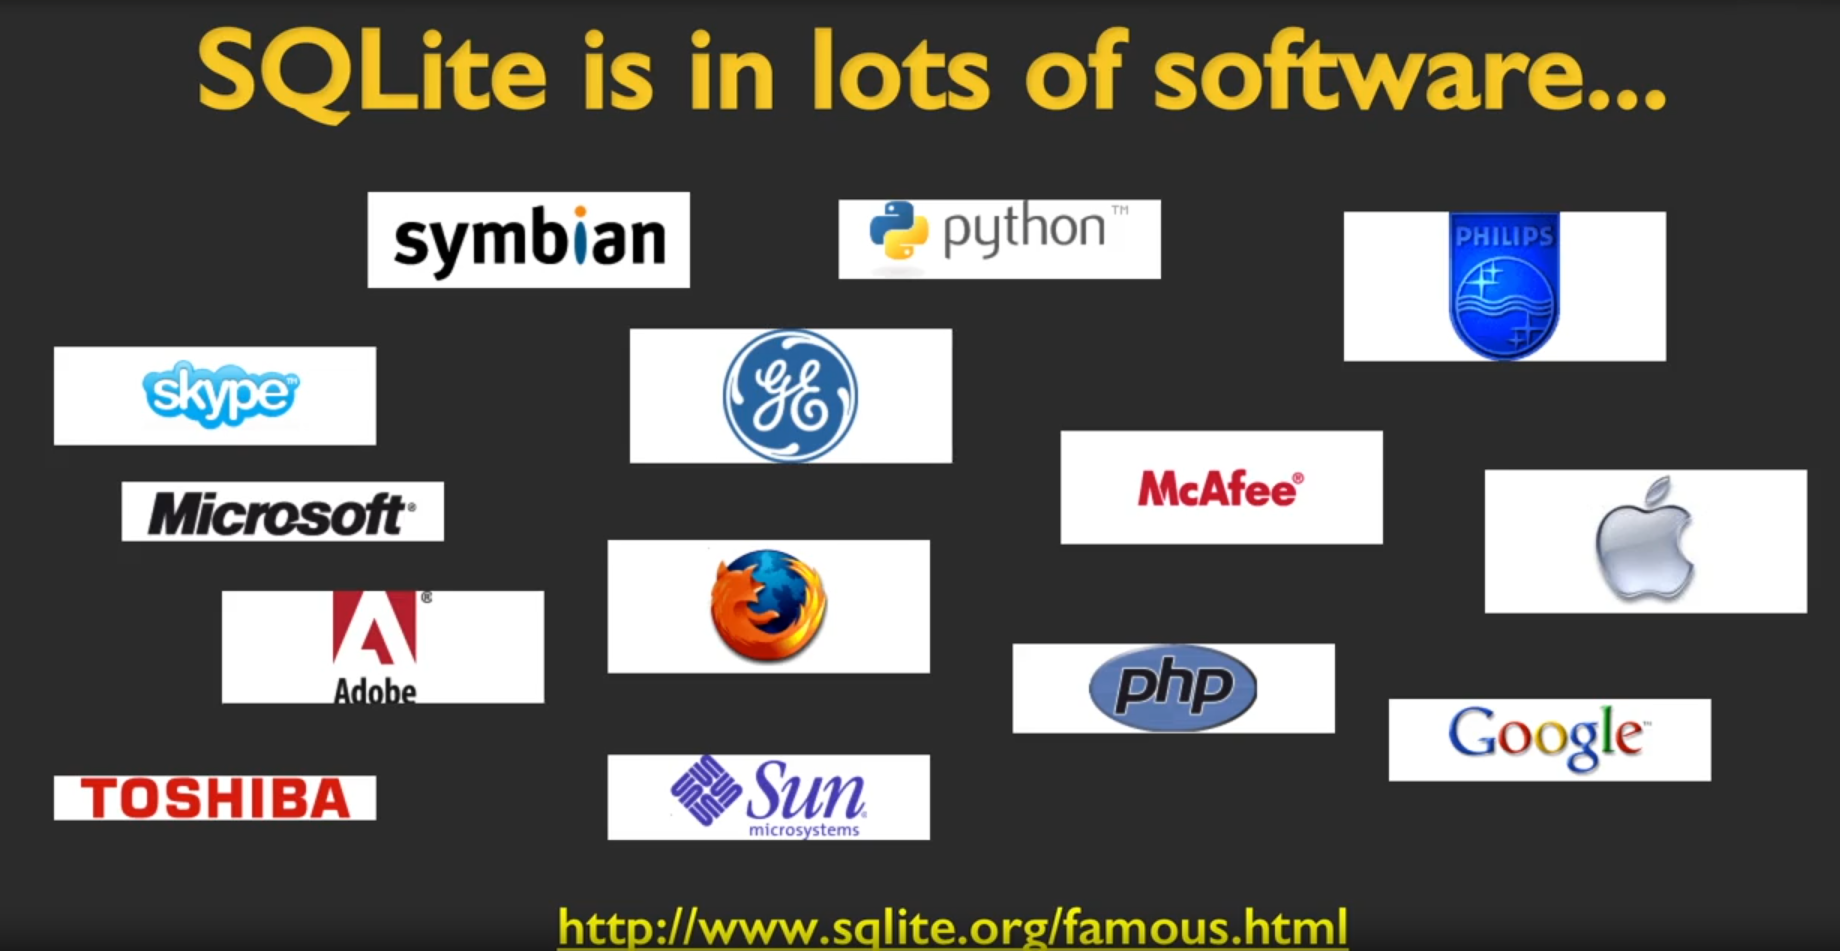

# Single Table CRUD
CRUD - Create Read Update Delete

In [3]:
import sqlite3

conn = sqlite3.connect ('emaildb.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS Counts_Email')

cur.execute('CREATE TABLE Counts_Email (email TEXT,count INTEGER)')

fname = input('Enter the file name: ')
if len(fname) < 1: fname = '../mbox-short.txt'

fh = open (fname)

for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    email = pieces[1]
    
    cur.execute('SELECT count FROM Counts_Email WHERE email = ?', (email,))
    
    row = cur.fetchone()
    
    if row is None:
        cur.execute('INSERT INTO Counts_Email (email, count) VALUES (?, 1)', (email,))
    else:
        cur.execute('UPDATE Counts_Email SET count = count + 1 WHERE email = ?', (email,))
    
    conn.commit()

#https://www.sqlite.org/lang_select.html

main_query = '''
                  SELECT email,count 
                  FROM Counts_Email 
                  ORDER BY count DESC 
                  LIMIT 10
             '''

for row in cur.execute(main_query):
    print(str(row[0]) , row[1])

cur.close()

Enter the file name: ../mbox.txt
zqian@umich.edu 195
mmmay@indiana.edu 161
cwen@iupui.edu 158
chmaurer@iupui.edu 111
aaronz@vt.edu 110
ian@caret.cam.ac.uk 96
jimeng@umich.edu 93
rjlowe@iupui.edu 90
dlhaines@umich.edu 84
david.horwitz@uct.ac.za 67


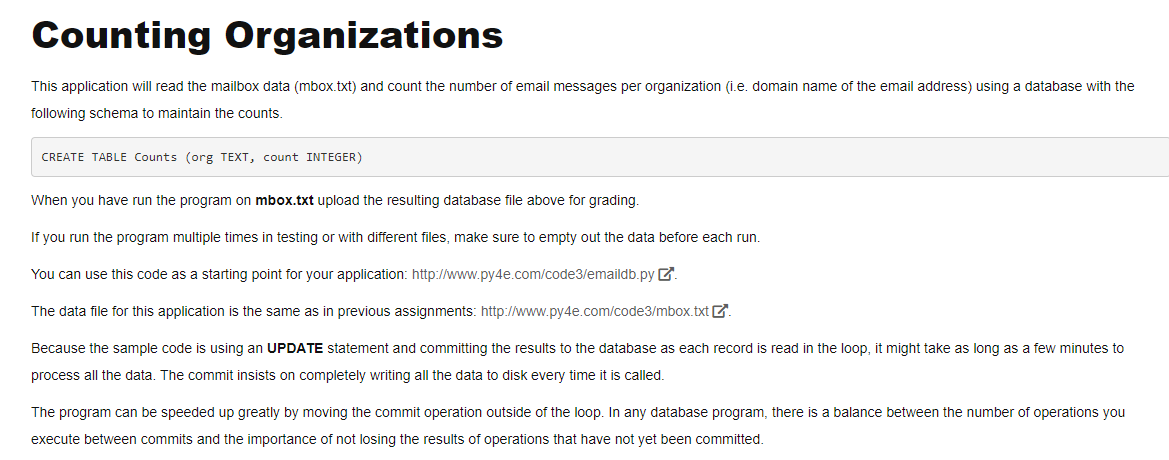

In [5]:
import sqlite3

conn = sqlite3.connect ('assignment.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS Counts')

cur.execute('CREATE TABLE Counts (org TEXT,count INTEGER)')


fname = input('Enter the file name: ')
if len(fname) < 1: fname = '../mbox-short.txt'

fh = open (fname)

for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    domain = pieces[1].split('@')[1]
    
    cur.execute('SELECT count FROM Counts WHERE org = ?', (domain,))
    
    row = cur.fetchone()
    
    if row is None:
        cur.execute('INSERT INTO Counts (org, count) VALUES (?, 1)', (domain,))
    else:
        cur.execute('UPDATE Counts SET count = count + 1 WHERE org = ?', (domain,))
    

conn.commit()

#https://www.sqlite.org/lang_select.html

main_query = '''
                  SELECT org,count 
                  FROM Counts 
                  ORDER BY count DESC
                  LIMIT 10
             '''

for row in cur.execute(main_query):
    print(str(row[0]) , row[1])

cur.close()

Enter the file name: ../mbox.txt
iupui.edu 536
umich.edu 491
indiana.edu 178
caret.cam.ac.uk 157
vt.edu 110
uct.ac.za 96
media.berkeley.edu 56
ufp.pt 28
gmail.com 25
et.gatech.edu 17


In [32]:
fname = input('Enter the file name: ')
if len(fname) < 1: fname = '../mbox.txt'

fh = open (fname)
count = dict()
max = 0

for line in fh:
    if not line.startswith('From: '): continue
    pieces = line.split()
    domain = pieces[1].split('@')[1].split('.')[0]
    count[domain] = count.get(domain , 0) + 1
    max = max if max > count[domain] else count[domain]

print(count)
print(max)

Enter the file name: 
{'uct': 96, 'media': 56, 'umich': 491, 'iupui': 536, 'caret': 157, 'gmail': 25, 'indiana': 178, 'et': 17, 'vt': 110, 'lancaster': 14, 'ucdavis': 1, 'ufp': 28, 'txstate': 17, 'stanford': 12, 'whitman': 17, 'rsmart': 8, 'fhda': 1, 'bu': 14, 'unicon': 9, 'loi': 9, 'utoronto': 1}
536
